### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 0s 4ms/step - loss: 33059.7539
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 32119.9141
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 31137.6465
Epoch 4/300
1/1 [==============================] - 0s 997us/step - loss: 29875.9746
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 28367.0703
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 26821.8223
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 25437.1250
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 24350.2012
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 23477.9082
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 22696.6543
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 21932.9512
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 21159.5703
Epoch 13/30

1/1 [==============================] - 0s 3ms/step - loss: 18.6986
Epoch 102/300
1/1 [==============================] - 0s 2ms/step - loss: 18.8108
Epoch 103/300
1/1 [==============================] - 0s 3ms/step - loss: 18.9250
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 19.0234
Epoch 105/300
1/1 [==============================] - 0s 999us/step - loss: 19.0932
Epoch 106/300
1/1 [==============================] - 0s 998us/step - loss: 19.1273
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 19.1241
Epoch 108/300
1/1 [==============================] - 0s 998us/step - loss: 19.0863
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 19.0202
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 18.9341
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 18.8376
Epoch 112/300
1/1 [==============================] - 0s 2ms/step - loss: 18.7393
Epoch 113/300
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 4.3946
Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 4.3971
Epoch 204/300
1/1 [==============================] - 0s 4ms/step - loss: 4.3790
Epoch 205/300
1/1 [==============================] - ETA: 0s - loss: 4.353 - 0s 2ms/step - loss: 4.3530
Epoch 206/300
1/1 [==============================] - 0s 2ms/step - loss: 4.3178
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 4.2951
Epoch 208/300
1/1 [==============================] - 0s 2ms/step - loss: 4.2858
Epoch 209/300
1/1 [==============================] - 0s 998us/step - loss: 4.2817
Epoch 210/300
1/1 [==============================] - 0s 997us/step - loss: 4.2779
Epoch 211/300
1/1 [==============================] - 0s 2ms/step - loss: 4.2613
Epoch 212/300
1/1 [==============================] - 0s 2ms/step - loss: 4.2433
Epoch 213/300
1/1 [==============================] - 0s 997us/step - loss: 4.2199
Epoch 214/300
1/1 [=====

### Predicting For the next 10 data

In [18]:
# demonstrate prediction for next 10 days
from array import array
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.52208]
1 day input [196.         210.         225.52207947]
1 day output [[237.84764]]
2 day input [210.         225.52207947 237.84764099]
2 day output [[253.27722]]
3 day input [225.52208 237.84764 253.27722]
3 day output [[269.1207]]
4 day input [237.84764 253.27722 269.1207 ]
4 day output [[284.28983]]
5 day input [253.27722 269.1207  284.28983]
5 day output [[301.49084]]
6 day input [269.1207  284.28983 301.49084]
6 day output [[319.09717]]
7 day input [284.28983 301.49084 319.09717]
7 day output [[337.162]]
8 day input [301.49084 319.09717 337.162  ]
8 day output [[356.76733]]
9 day input [319.09717 337.162   356.76733]
9 day output [[377.07523]]
[225.52208, 237.84764, 253.27722, 269.1207, 284.28983, 301.49084, 319.09717, 337.162, 356.76733, 377.07523]


In [19]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [20]:
len(timeseries_data)

9

In [21]:
lst_output

[225.52208,
 237.84764,
 253.27722,
 269.1207,
 284.28983,
 301.49084,
 319.09717,
 337.162,
 356.76733,
 377.07523]

### Visualizaing The Output

In [23]:
import matplotlib.pyplot as plt

In [24]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

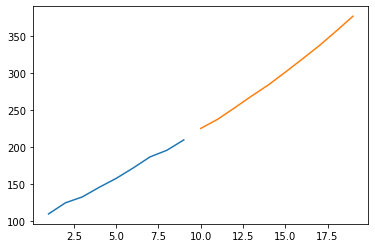

In [25]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
